In [1]:
#Julkaistut Lego setit aikaväliltä 1965-2022
#jäsenet: Ella Heikkinen Jemina Laukkanen Yasmin Ebrahimi Miika Konttila Hanna Honkonen


#Tuodaan datasetti ja katsotaan vähän miltä suunnilleen näyttää
import pandas as pd
import numpy as np
data = pd.read_csv("https://raw.githubusercontent.com/Ella22011/Analysointi2023/main/lego-sets.csv")

data.head(10)

,id,name,category,year,parts,img_link,set_link,raw_price,mean_price
0,21036-1,Arc de Triomphe,Architecture,2017.0,386.0,/sets/21036-1/12061.jpg/180x180p.jpg,/sets/21036-1/arc-de-triomphe/,"['\n$73.87\n', '\n$73.87\n']",73.87
1,21050-1,Architecture Studio,Architecture,2013.0,1211.0,/sets/21050-1/17335.jpg/180x180p.jpg,/sets/21050-1/architecture-studio/,[],0.00
2,21027-1,Berlin,Architecture > Skylines,2016.0,289.0,/sets/21027-1/32614.jpg/180x180p.jpg,/sets/21027-1/berlin/,"['\n$380.00\n', '\n$380.00\n']",380.00
3,21013-1,Big Ben,Architecture,2012.0,346.0,/sets/21013-1/13705.jpg/180x180p.jpg,/sets/21013-1/big-ben/,[],0.00
4,21029-1,Buckingham Palace,Architecture,2016.0,780.0,/sets/21029-1/7908.jpg/180x180p.jpg,/sets/21029-1/buckingham-palace/,"['\n$105.12\n', '\n$105.12\n']",105.12
5,21008-1,Burj Khalifa,Architecture,2011.0,208.0,/sets/21008-1/16351.jpg/180x180p.jpg,/sets/21008-1/burj-khalifa/,[],0.00
6,21031-1,Burj Khalifa,Architecture,2016.0,333.0,/sets/21031-1/32874.jpg/180x180p.jpg,/sets/21031-1/burj-khalifa/,[],0.00
7,21055-1,Burj Khalifa,Architecture,2019.0,333.0,/sets/21055-1/76385.jpg/180x180p.jpg,/sets/21055-1/burj-khalifa/,"['\n$133.99\n', '\n$99.12\n', '\n$133.99\n', '...",116.56
8,21033-1,Chicago,Architecture > Skylines,2017.0,444.0,/sets/21033-1/15369.jpg/180x180p.jpg,/sets/21033-1/chicago/,"['\n$200.00\n', '\n$200.00\n']",200.00
9,21052-1,Dubai,Architecture > Skylines,2020.0,740.0,/sets/21052-1/18567.jpg/180x180p.jpg,/sets/21052-1/dubai/,"['\n$82.49\n', '\n$57.99\n', '\n$73.34\n', '\n...",71.27


In [2]:
#Katsotaan vähän tarkemmin datasetin sarakkeita, data tyyppejä ja kokoa
data.columns
data.index
data.shape #(rows, columns)
data.values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5075 entries, 0 to 5074
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id          5075 non-null   object 
 1   name        5075 non-null   object 
 2   category    5075 non-null   object 
 3   year        5075 non-null   float64
 4   parts       5075 non-null   float64
 5   img_link    5075 non-null   object 
 6   set_link    5075 non-null   object 
 7   raw_price   5075 non-null   object 
 8   mean_price  5075 non-null   float64
dtypes: float64(3), object(6)
memory usage: 357.0+ KB


In [3]:
#Vaihdetaan nolla arvot NaN arvoilla jotta saadaan oikea luku puuttuvista arvoista.
#Tietoa puuttuu osista ja hinnoista

data.replace(0, np.nan, inplace=True)
missing_count = data.isnull().sum()
print(missing_count)
total_data=np.product(data.shape)
total_missing=missing_count.sum()
per_of_missing_data=(total_missing/total_data)* 100
print(f"Missing data: {per_of_missing_data}")

id               0
name             0
category         0
year             0
parts          320
img_link         0
set_link         0
raw_price        0
mean_price    1834
dtype: int64
Missing data: 4.7159277504105095


In [4]:
# lets create a new data frame by dropping all null values
data.replace(0, np.nan, inplace=True)
data1=data.dropna()

missing_count2 = data1.isnull().sum()
print(missing_count2)
total_data2=np.product(data1.shape)
total_missing2=missing_count2.sum()
per_of_missing_data2=(total_missing2/total_data2)* 100
print(f"Missing data: {per_of_missing_data2}")

id            0
name          0
category      0
year          0
parts         0
img_link      0
set_link      0
raw_price     0
mean_price    0
dtype: int64
Missing data: 0.0


In [5]:
#Hinnat luokiteltuna "Halpa", "Keskihintainen", "Kallis" ja "Hinta ei tiedossa"

data.replace(np.nan, 0, inplace=True)
def categorize_price(mean_price):
    if mean_price < 100 and mean_price > 0:
        return 'Halpa'
    elif mean_price < 250 and mean_price > 0:
        return 'Keskihintainen'
    elif mean_price == 0:
        return 'Hinta ei tiedossa'
    else:
        return 'Kallis'

data['price_group'] = data['mean_price'].apply(categorize_price)
data.head(10)

,id,name,category,year,parts,img_link,set_link,raw_price,mean_price,price_group
0,21036-1,Arc de Triomphe,Architecture,2017.0,386.0,/sets/21036-1/12061.jpg/180x180p.jpg,/sets/21036-1/arc-de-triomphe/,"['\n$73.87\n', '\n$73.87\n']",73.87,Halpa
1,21050-1,Architecture Studio,Architecture,2013.0,1211.0,/sets/21050-1/17335.jpg/180x180p.jpg,/sets/21050-1/architecture-studio/,[],0.00,Hinta ei tiedossa
2,21027-1,Berlin,Architecture > Skylines,2016.0,289.0,/sets/21027-1/32614.jpg/180x180p.jpg,/sets/21027-1/berlin/,"['\n$380.00\n', '\n$380.00\n']",380.00,Kallis
3,21013-1,Big Ben,Architecture,2012.0,346.0,/sets/21013-1/13705.jpg/180x180p.jpg,/sets/21013-1/big-ben/,[],0.00,Hinta ei tiedossa
4,21029-1,Buckingham Palace,Architecture,2016.0,780.0,/sets/21029-1/7908.jpg/180x180p.jpg,/sets/21029-1/buckingham-palace/,"['\n$105.12\n', '\n$105.12\n']",105.12,Keskihintainen
5,21008-1,Burj Khalifa,Architecture,2011.0,208.0,/sets/21008-1/16351.jpg/180x180p.jpg,/sets/21008-1/burj-khalifa/,[],0.00,Hinta ei tiedossa
6,21031-1,Burj Khalifa,Architecture,2016.0,333.0,/sets/21031-1/32874.jpg/180x180p.jpg,/sets/21031-1/burj-khalifa/,[],0.00,Hinta ei tiedossa
7,21055-1,Burj Khalifa,Architecture,2019.0,333.0,/sets/21055-1/76385.jpg/180x180p.jpg,/sets/21055-1/burj-khalifa/,"['\n$133.99\n', '\n$99.12\n', '\n$133.99\n', '...",116.56,Keskihintainen
8,21033-1,Chicago,Architecture > Skylines,2017.0,444.0,/sets/21033-1/15369.jpg/180x180p.jpg,/sets/21033-1/chicago/,"['\n$200.00\n', '\n$200.00\n']",200.00,Keskihintainen
9,21052-1,Dubai,Architecture > Skylines,2020.0,740.0,/sets/21052-1/18567.jpg/180x180p.jpg,/sets/21052-1/dubai/,"['\n$82.49\n', '\n$57.99\n', '\n$73.34\n', '\n...",71.27,Halpa


In [6]:
#Tutkitaan tärkeimpiä tietoja
data.loc[(data['mean_price'] > 2000)]

,id,name,category,year,parts,img_link,set_link,raw_price,mean_price,price_group
1313,10189-1,Taj Mahal,Creator > Creator Expert,2008.0,5922.0,/sets/10189-1/52584.jpg/180x180p.jpg,/sets/10189-1/taj-mahal/,"['\n$2,203.78\n', '\n$2,203.78\n']",2203.78,Kallis
3046,10018-1,Darth Maul,Star Wars > Ultimate Collector Series,2001.0,1868.0,/sets/10018-1/6651.jpg/180x180p.jpg,/sets/10018-1/darth-maul/,"['\n$2,040.01\n', '\n$2,040.01\n']",2040.01,Kallis
3784,5004590-1,Bat Pod,Super Heroes DC > Batman,2015.0,338.0,/sets/5004590-1/14982.jpg/180x180p.jpg,/sets/5004590-1/bat-pod/,"['\n$2,206.87\n', '\n$2,206.87\n']",2206.87,Kallis


In [7]:
min_price = np.min(data1['mean_price'])
max_price = np.max(data1['mean_price'])

min_parts = np.min(data1['parts'])
max_parts = np.max(data1['parts'])

print(f"Cheapest lego set: {min_price:.2f} $")
print(f"Most expensive lego set: {max_price:.2f} $")

print(f"Least lego parts in a set: {int(min_parts)}")
print(f"Most lego parts in a set: {int(max_parts)}")

Cheapest lego set: 1.00 $
Most expensive lego set: 2206.87 $
Least lego parts in a set: 1
Most lego parts in a set: 9092


In [8]:
#Rajataan outlierit lego seteistä. Tässä tapauksessa legosettien, joiden palamäärä on 3-1.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv("https://raw.githubusercontent.com/Ella22011/Analysointi2023/main/lego-sets.csv")

df.columns
df.index
df.shape
df.values


df.loc[(df['parts'] <= 3) & (df['parts'] > 0)]
# Suodatetaan DataFrame ne riviin, joissa 'parts' on suurempi kuin 0 ja enintään 3
filtered_df = df.loc[(df['parts'] > 0) & (df['parts'] <= 3)]

# Lasketaan arvojen määrä 'parts' sarakkeessa ja tulostetaan tulos
parts_counts = filtered_df['parts'].value_counts()

# Tulostetaan arvojen määrä
print(parts_counts)

parts
1.0    26
3.0    12
2.0     7
Name: count, dtype: int64


In [9]:
#Print columns name that represent nominal attributes

import pandas as pd
import numpy as np
data = pd.read_csv("https://raw.githubusercontent.com/Ella22011/Analysointi2023/main/lego-sets.csv")

nominal_columns = data.select_dtypes(include=['object']).columns

for column in nominal_columns:
    print (column)

id
name
category
img_link
set_link
raw_price


In [12]:
#Varianssi, eli kuinka paljon keskihajontaa tiedoissa on (mitä suurempi lukema, sitä enemmän eroavaisuutta keskihajonnassa)
import pandas as pd
import numpy as np

df = pd.read_csv("https://raw.githubusercontent.com/Ella22011/Analysointi2023/main/lego-sets.csv")

#lasketaan varianssit
print("Vuosien varianssi on", df.year.var())
print("Osien varianssi on", df.parts.var())
print("Hintojen varianssi on", df.mean_price.var())

Vuosien varianssi on 57.107950859302036
Osien varianssi on 375559.4189017322
Hintojen varianssi on 17398.648665974302


In [13]:
min_price = np.min(data1['mean_price'])
max_price = np.max(data1['mean_price'])

min_parts = np.min(data1['parts'])
max_parts = np.max(data1['parts'])

print(f"Cheapest lego set: {min_price:.2f} $")
print(f"Most expensive lego set: {max_price:.2f} $")

print(f"Least lego parts in a set: {int(min_parts)}")
print(f"Most lego parts in a set: {int(max_parts)}")

Cheapest lego set: 1.00 $
Most expensive lego set: 2206.87 $
Least lego parts in a set: 1
Most lego parts in a set: 9092


In [14]:
total_sum = np.sum(data1['mean_price'])
print(f"The total sum of available prices is: {total_sum:.2f} $")

average_price = np.mean(data1['mean_price'])
print(f"Average price of lego sets: {average_price:.2f} $")

average_parts = np.mean(data1['parts'])
print(f"Average amount of lego parts in a set: {average_parts:.2f}")

The total sum of available prices is: 274511.10 $
Average price of lego sets: 85.30 $
Average amount of lego parts in a set: 415.74


Standard Deviation:
year           7.56
parts        612.83
mean_price   131.90
dtype: float64


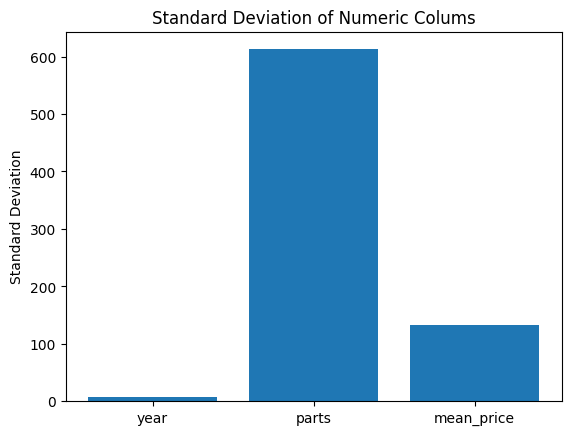

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv("http://raw.githubusercontent.com/Ella22011/Analysointi2023/main/lego-sets.csv")

pd.set_option('display.float_format', '{:.2f}'.format)

std_deviation = data.std(numeric_only=True)

print("Standard Deviation:")
print(std_deviation)

plt.bar(std_deviation.index, std_deviation.values)
plt.title('Standard Deviation of Numeric Colums')
plt.ylabel('Standard Deviation')
plt.show()



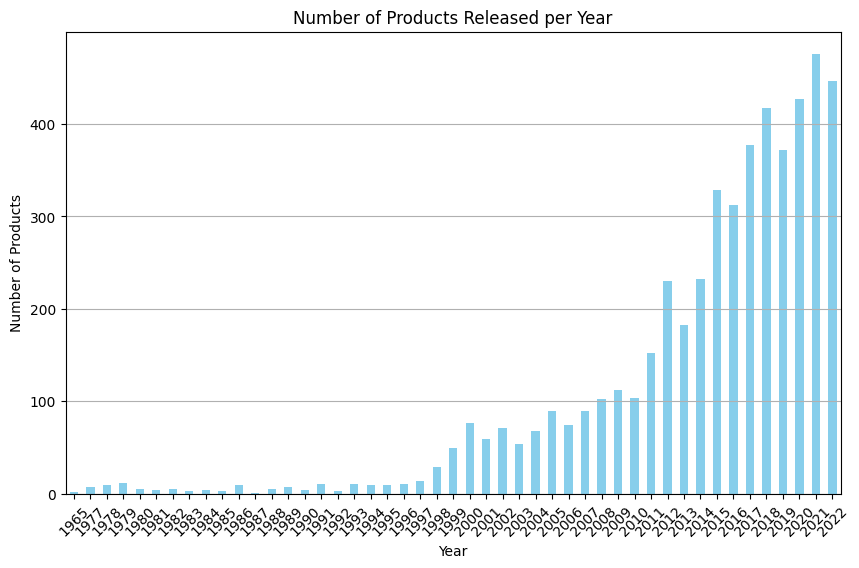

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv("https://raw.githubusercontent.com/Ella22011/Analysointi2023/main/lego-sets.csv")

id_count_per_year = data.groupby('year')['id'].count()

plt.figure(figsize=(10, 6))
id_count_per_year.plot(kind='bar', color='skyblue')
plt.title('Number of Products Released per Year')
plt.xlabel('Year')
plt.ylabel('Number of Products')
plt.xticks(range(len(id_count_per_year)), id_count_per_year.index.astype(int), rotation=45)
plt.grid(axis='y')
plt.show()

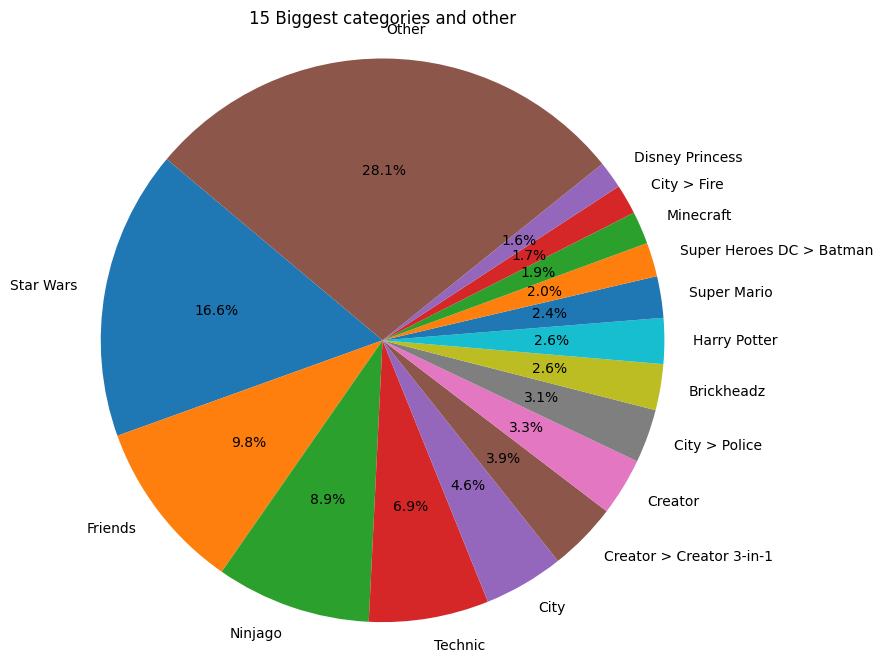

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv("https://raw.githubusercontent.com/Ella22011/Analysointi2023/main/lego-sets.csv")

category_counts = data['category'].value_counts()

top_15_categories = category_counts.head(15)

other_categories = category_counts[~category_counts.index.isin(top_15_categories.index)]
other_total = other_categories.sum()

if len(other_categories) > 0:
    if len(other_categories) == 1:
        top_15_categories[other_categories.index[0]] = other_total
    else:
        top_15_categories['Other'] = other_total


plt.figure(figsize=(8, 8))
plt.pie(top_15_categories, labels=top_15_categories.index, autopct='%1.1f%%', startangle=140)
plt.title('15 Biggest categories and other')
plt.axis('equal')
plt.show()

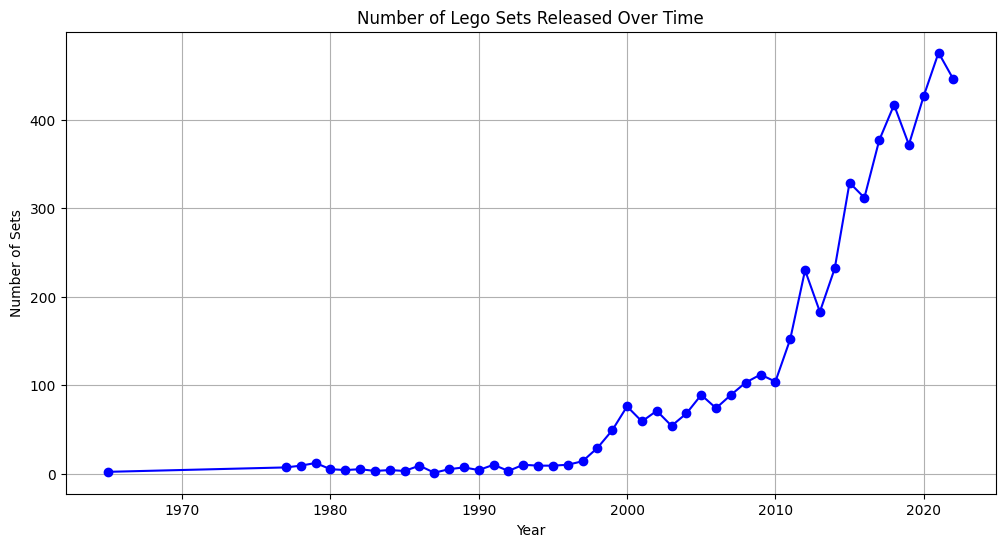

In [18]:
#line plot: It visualizes the trend in the number of Lego sets released over time.
import pandas as pd
import matplotlib.pyplot as plt



data = pd.read_csv("https://raw.githubusercontent.com/Ella22011/Analysointi2023/main/lego-sets.csv")


plt.figure(figsize=(12, 6))
line_data = data.groupby('year')['id'].count()
line_data.plot(marker='o', linestyle='-', color='b')

plt.title('Number of Lego Sets Released Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Sets')
plt.grid(True)
plt.show()

C:\Users\zeina\AppData\Local\Temp\ipykernel_16396\3422335431.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='category', y='mean_price', data=data, palette='Set2', inner='quartile')


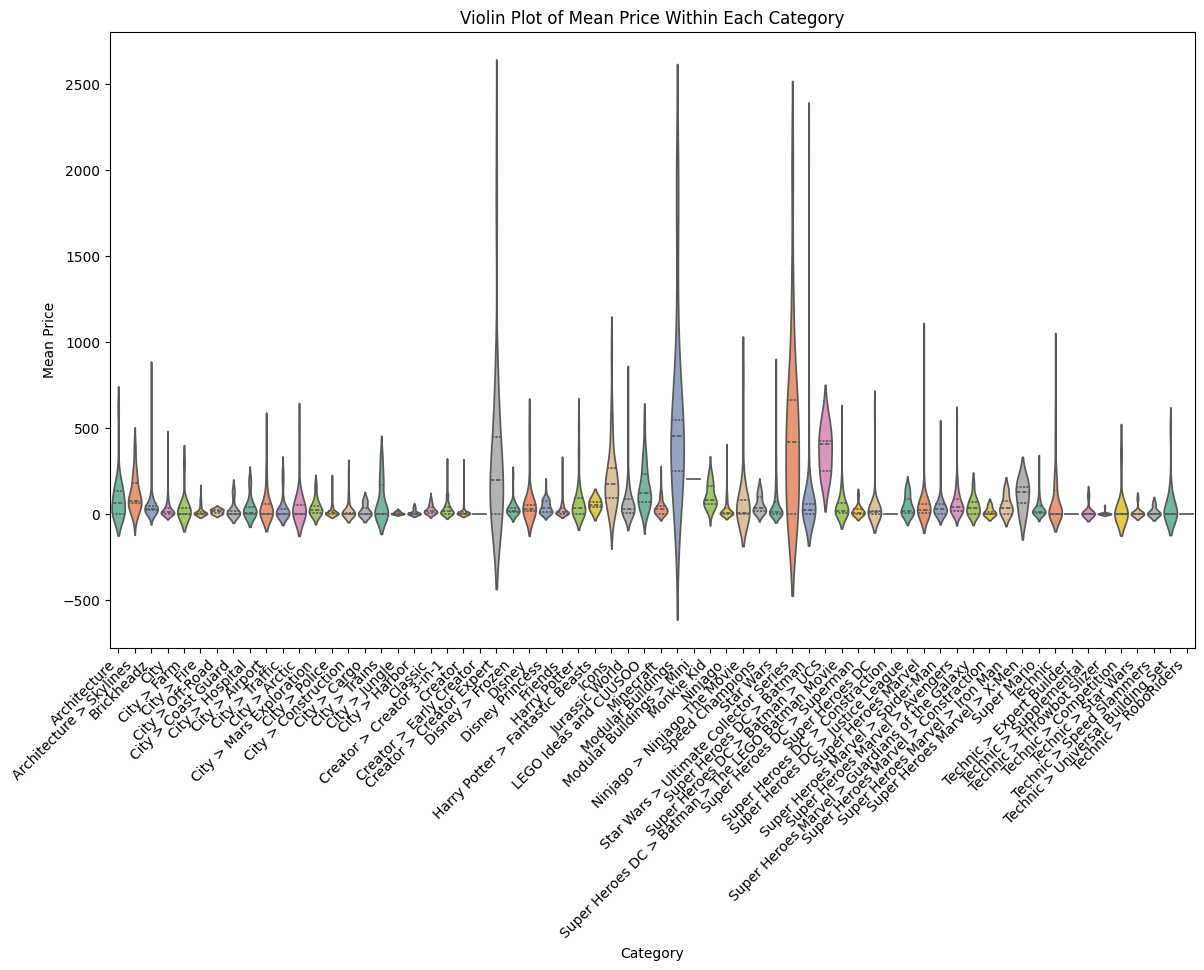

In [19]:
#Violin plot: This chart compares the distribution of mean prices across different Lego set categories,
#providing insights into the central tendency and spread of prices within each category.

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


data = pd.read_csv("https://raw.githubusercontent.com/Ella22011/Analysointi2023/main/lego-sets.csv")


plt.figure(figsize=(14, 8))
sns.violinplot(x='category', y='mean_price', data=data, palette='Set2', inner='quartile')


plt.title('Violin Plot of Mean Price Within Each Category')
plt.xlabel('Category')
plt.ylabel('Mean Price')
plt.xticks(rotation=45, ha='right')

plt.show()
